In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [17]:
# Set the parameters
R = 0.1        # Growth rate parameter
f = 0.78       # Prey capture efficiency
lambd = 0.01   # Interaction strength
N_predator = 1 # Initial predator population
N_parasite = 1 # Initial parasite population

# Set the initial conditions
M0 = 100  # Initial male population
N0 = 100  # Initial female population
initial_conditions = [M0, N0]


 $ \frac {dN_ {male}}{dt} $ =R $ \cdot $ f(G)- $ \lambda $ $ \cdot $ $ N_ {predator} $ $ \cdot $ $ N_ {male} $ 
 $ \frac {dN_ {female}}{dt} $ =R $ \cdot $ (1-f(G))- $ \lambda $ $ \cdot $ $ N_ {parasite} $ $ \cdot $ $ N_ {female} $ 
其中：
- \(M_{\text{male}}\) 表示雄性个体的数量。
- \(N_{\text{female}}\) 表示雌性个体的数量。
- \(R\) 是繁殖率。
- \(f(G)\) 是与某种基因或基因组相关的函数。
- \(\lambda\) 是影响捕食和寄生的因子。
- \(N_{\text{predator}}\) 是捕食者的数量。
- \(N_{\text{parasite}}\) 是寄生者的数量。


In [18]:
# define the lotka-volterra prey-predator model
def lotka_volterra(y, t, R, f, lambd, N_predator, N_parasite):
    N_male, N_female = y
    dM_dt = R * f - lambd * N_predator * N_male
    dN_dt = R * (1 - f) - lambd * N_parasite * N_female
    return [dM_dt, dN_dt]

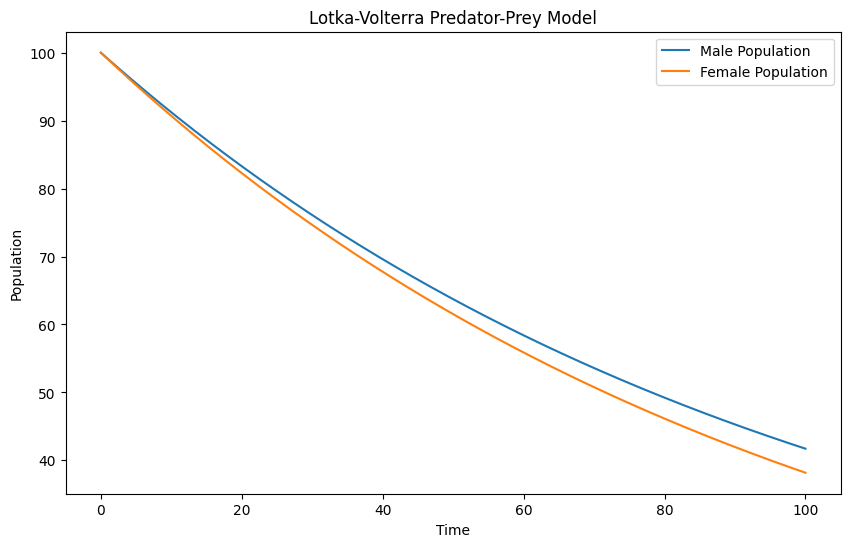

In [19]:
# Set the time points for integration
t = np.linspace(0, 100, 1000)

# Solve the differential equations using odeint
solution = odeint(lotka_volterra, initial_conditions, t, args=(R, f, lambd, N_predator, N_parasite))

# Extract the solution for male and female populations
M_male, N_female = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, M_male, label='Male Population')
plt.plot(t, N_female, label='Female Population')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra Predator-Prey Model')
plt.legend()
plt.show()

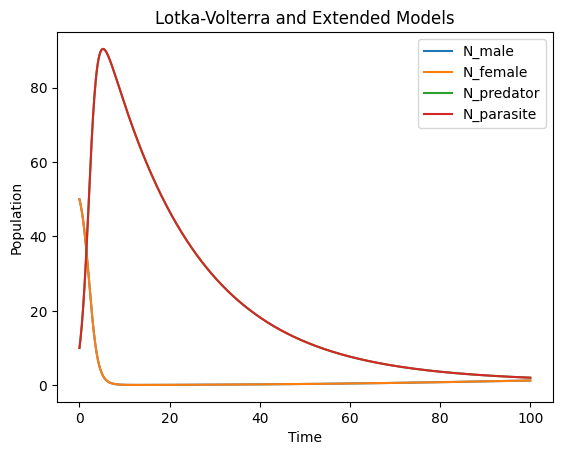

In [22]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Lotka-Volterra模型，包括雄性和雌性个体的动态
def lotka_volterra(y, t, R, f, lambd, alpha, beta, delta_p, delta_r):
    N_male, N_female, N_predator, N_parasite = y
    dN_male_dt = R * f - lambd * N_predator * N_male
    dN_female_dt = R * (1 - f) - lambd * N_parasite * N_female
    dN_predator_dt = alpha * N_predator * N_male - delta_p * N_predator
    dN_parasite_dt = beta * N_parasite * N_female - delta_r * N_parasite
    return [dN_male_dt, dN_female_dt, dN_predator_dt, dN_parasite_dt]

# 参数
R = 0.1  # 繁殖率
f = 0.5  # 基因或基因组相关函数的简化示例
lambd = 0.01  # 捕食/寄生影响因子
alpha = 0.02  # 捕食者转化率
beta = 0.02  # 寄生者转化率
delta_p = 0.05  # 捕食者自然死亡率
delta_r = 0.05  # 寄生者自然死亡率

# 初始条件
y0 = [50, 50, 10, 10]  

# 时间点
t = np.linspace(0, 100, 1000)

# 求解ODE
sol = odeint(lotka_volterra, y0, t, args=(R, f, lambd, alpha, beta, delta_p, delta_r))

# 绘图
plt.plot(t, sol[:, 0], label='N_male')
plt.plot(t, sol[:, 1], label='N_female')
plt.plot(t, sol[:, 2], label='N_predator')
plt.plot(t, sol[:, 3], label='N_parasite')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra and Extended Models')
plt.show()

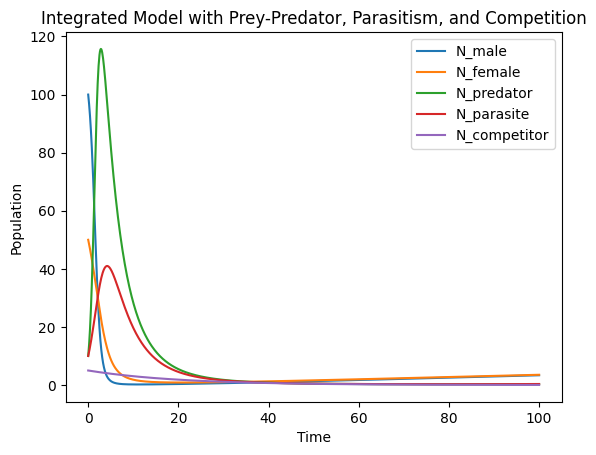

In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 综合模型，包含猎物-捕食者动态、性别分别的繁殖、寄生和竞争效应
def integrated_model(y, t, R, f, lambd, alpha, beta, delta_p, delta_r, gamma_c, delta_c):
    N_male, N_female, N_predator, N_parasite, N_competitor = y
    dN_male_dt = R * f - lambd * N_predator * N_male - gamma_c * N_competitor * N_male  # 竞争影响雄性
    dN_female_dt = R * (1 - f) - lambd * N_parasite * N_female - gamma_c * N_competitor * N_female  # 竞争影响雌性
    dN_predator_dt = alpha * N_predator * N_male - delta_p * N_predator - delta_c * N_competitor * N_predator  # 竞争者影响捕食者
    dN_parasite_dt = beta * N_parasite * N_female - delta_r * N_parasite - delta_c * N_competitor * N_parasite  # 竞争者影响寄生者
    dN_competitor_dt = -delta_c * N_competitor # 竞争者的自身动态，可能包括与其他种群的竞争或自身的衰减
    return [dN_male_dt, dN_female_dt, dN_predator_dt, dN_parasite_dt, dN_competitor_dt]

# 参数
R = 0.1  # 繁殖率
f = 0.5  # 性别比例
lambd = 0.01  # 捕食/寄生因子
alpha = 0.02  # 捕食者转化率
beta = 0.02  # 寄生者转化率
delta_p = 0.05  # 捕食者死亡率
delta_r = 0.05  # 寄生者死亡率
gamma_c = 0.01  # 竞争对雄性和雌性的影响
delta_c = 0.05  # 竞争者对捕食者和寄生者的影响

# 初始条件
y0 = [100, 50, 10, 10, 5] # 初始条件包括雄性、雌性、捕食者、寄生者和竞争者的数量

# 时间点
t = np.linspace(0, 100, 1000)

# 求解ODE,ode是ordinary differential equations的常微分方程
sol = odeint(integrated_model, y0, t, args=(R, f, lambd, alpha, beta, delta_p, delta_r, gamma_c, delta_c))

# 绘图
plt.plot(t, sol[:, 0], label='N_male')
plt.plot(t, sol[:, 1], label='N_female')
plt.plot(t, sol[:, 2], label='N_predator')
plt.plot(t, sol[:, 3], label='N_parasite')
plt.plot(t, sol[:, 4], label='N_competitor')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Integrated Model with Prey-Predator, Parasitism, and Competition')
plt.show()

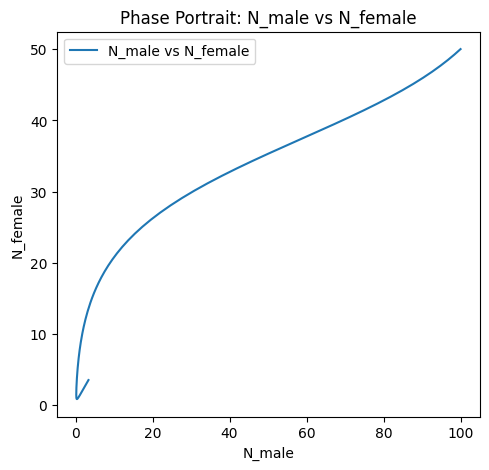

In [28]:
# 雄性 vs 雌性 相位图
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 开启1行2列的第1个子图
plt.plot(sol[:, 0], sol[:, 1], label='N_male vs N_female')
plt.xlabel('N_male')
plt.ylabel('N_female')
plt.title('Phase Portrait: N_male vs N_female')
plt.legend()


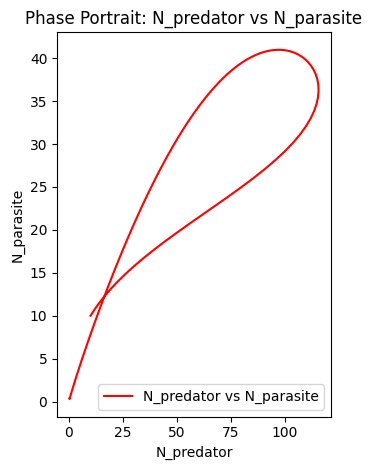

In [29]:
# 捕食者 vs 寄生者 相位图
plt.subplot(1, 2, 2)  # 开启1行2列的第2个子图
plt.plot(sol[:, 2], sol[:, 3], 'r', label='N_predator vs N_parasite')
plt.xlabel('N_predator')
plt.ylabel('N_parasite')
plt.title('Phase Portrait: N_predator vs N_parasite')
plt.legend()

plt.tight_layout()  # 优化子图间距
plt.show()

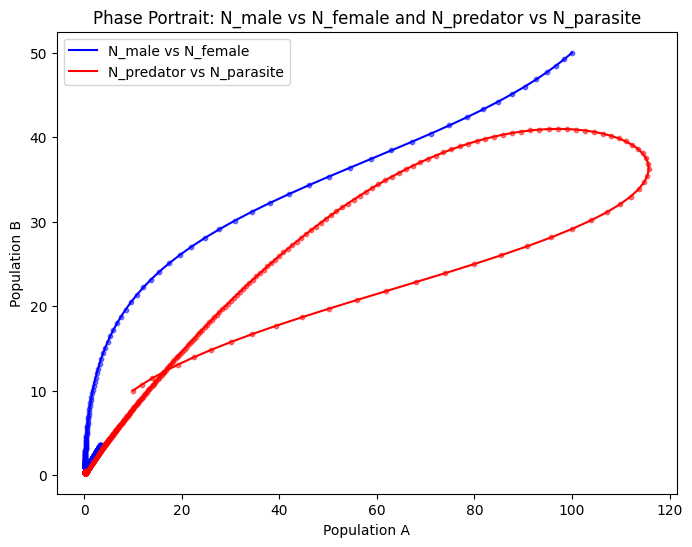

In [30]:
# 绘制雄性vs雌性和捕食者vs寄生者的相位图
plt.figure(figsize=(8, 6))  # 设置图形的大小

# 雄性 vs 雌性 相位图
plt.plot(sol[:, 0], sol[:, 1], label='N_male vs N_female', color='blue')
plt.scatter(sol[:, 0], sol[:, 1], color='blue', s=10, alpha=0.5)  # 添加散点以强调轨迹

# 捕食者 vs 寄生者 相位图
plt.plot(sol[:, 2], sol[:, 3], label='N_predator vs N_parasite', color='red')
plt.scatter(sol[:, 2], sol[:, 3], color='red', s=10, alpha=0.5)  # 添加散点以强调轨迹

plt.xlabel('Population A')
plt.ylabel('Population B')
plt.title('Phase Portrait: N_male vs N_female and N_predator vs N_parasite')
plt.legend()

plt.show()